In [108]:
import pandas as pd

df_data = pd.read_csv("data.csv")
print(df_data.columns.to_list())
#df_data

['age', 'BMI', 'gender', '1test Ex', '1test In', 'ComorbCCC', 'ComorbL', 'CD\\Ozhir', 'ComorbAll', 'L 109', 'LF', 'ROX', 'SpO2', 'SpO2\\FiO', 'chD', 'measurementday', 'dayshome', 'Result', '>7 or <7', 'daystoresult']


In [110]:
import torch
import NN

feature_columns = df_data.drop(
    columns=['1test Ex', '1test In',
             'ComorbCCC', 'ComorbL', 'SpO2',
             'SpO2\\FiO', 'chD', 'measurementday',
             'dayshome', 'Result',
             '>7 or <7', 'daystoresult'])
feature_tensors = torch.tensor(feature_columns.values, dtype=torch.float64)
result_tensor = torch.tensor(df_data['>7 or <7'].values, dtype=torch.float64)
#result_tensor = torch.tensor([1 if res == 'H' else 0 for res in df_data[">7 or <7"]], dtype=torch.float64)

feature_tensors.shape

torch.Size([384, 8])

In [111]:
result_tensor.shape

torch.Size([384])

In [112]:
device = NN.getDevice()

features = feature_tensors.to(device=device)
labels = result_tensor.to(device=device)

device

device(type='cuda')

In [113]:
from torch.utils.data import DataLoader

custom_dataset = NN.CustomDataset(
    feature_tensors=features,
    result_tensor=labels)

batch_size = 8

dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

In [125]:
in_size = features.shape[1]
hidd_size = 32
out_size = 1

lr = 0.01
num_e = 10000

In [115]:
import torch.optim as optim

model = NN.NN(in_size, hidd_size, out_size)
model.to(device=device)
optimizer = optim.SGD(model.parameters(), lr, 0.1)
criterion = NN.nn.MSELoss()

In [138]:
for epoch in range(num_e):
    total_loss = 0.0
    for batch_x, batch_y in dataloader:
        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y.unsqueeze(1))  # Reshape batch_y if needed

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print the average loss for this epoch
    average_loss = total_loss / len(dataloader)
    if epoch % 1000 == 0 or epoch == num_e - 1:
        print(f'Epoch [{epoch + 1}/{num_e}], Loss: {average_loss:.4f}')


Epoch [1/10000], Loss: 0.0969
Epoch [1001/10000], Loss: 0.1160
Epoch [2001/10000], Loss: 0.1114
Epoch [3001/10000], Loss: 0.0996
Epoch [4001/10000], Loss: 0.0972
Epoch [5001/10000], Loss: 0.0994
Epoch [6001/10000], Loss: 0.1088
Epoch [7001/10000], Loss: 0.1057
Epoch [8001/10000], Loss: 0.1372
Epoch [9001/10000], Loss: 0.1106
Epoch [10000/10000], Loss: 0.0917


In [139]:
predict = model(features)
#predict

In [140]:
for e, y in zip(labels, predict):
    print(f"{y[0]}, {e}")

1.0, 1.0
1.975577704538265e-152, 0.0
1.0, 1.0
1.0, 1.0
1.0, 1.0
1.0, 1.0
1.0, 1.0
6.260460350959466e-173, 0.0
0.9956775998550299, 1.0
0.9742195500425481, 1.0
5.938399662977651e-16, 0.0
1.0, 1.0
0.024886822247580848, 0.0
1.0, 1.0
2.506683644207128e-07, 0.0
4.54271646198091e-16, 0.0
2.167050470197103e-05, 0.0
1.0, 1.0
6.120162465175857e-182, 0.0
1.1981364251561086e-166, 0.0
0.02318077486726193, 0.0
9.444335400750721e-92, 0.0
2.3085691430896316e-05, 0.0
2.9106815510843587e-69, 0.0
1.0, 1.0
1.96579790316761e-19, 0.0
1.0, 1.0
1.0, 1.0
0.8705472444020786, 1.0
0.0008492050149322282, 1.0
0.10516333465624939, 0.0
0.9999831402069704, 1.0
1.0, 1.0
0.9999988921873806, 0.0
2.1771954878567995e-79, 0.0
3.734285861247845e-09, 0.0
6.287990416667648e-80, 0.0
5.970423148467644e-72, 0.0
1.0, 1.0
0.9664691645666478, 1.0
0.9136601105241307, 1.0
0.8852075562081891, 1.0
0.5238002876844265, 1.0
6.273059159781673e-13, 0.0
0.022800116063047986, 0.0
1.6791450570661576e-27, 0.0
0.021535799856582424, 0.0
1.0, 1.0
1

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_true = labels.to("cpu").detach().numpy()
y_scores = predict.to("cpu").detach().numpy()

fpr, tpr, thresholds = roc_curve(y_true, y_scores)
auc = roc_auc_score(y_true, y_scores)

print('AUC: ', auc)

AUC:  0.9238179588499795


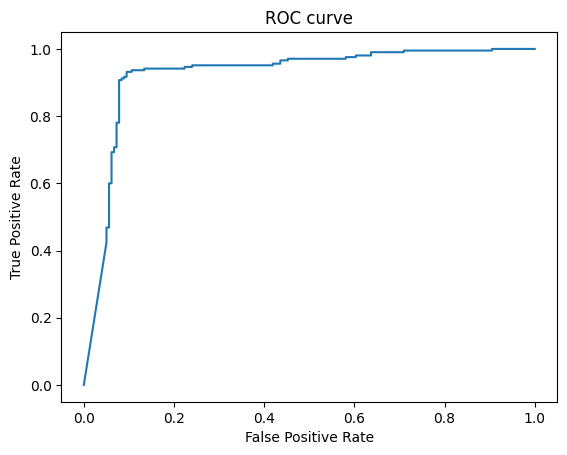

In [142]:
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()